In [1]:
!pip install yfinance
!pip install bs4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.8/99.8 kB 13.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1256 sha256=4af2f080bf88295ddf43c5ac99a8839b900b7717bb18b86c6e881e4387800c7f
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/77/8a/04/7b1a8ce5de6555a18e09370d3d4fde48be9571ac07a623071e
Successfully built bs4


In [40]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

<h4> Question 1: Use yfinance to Extract Stock Data <h4>
Reset the index, save, and display the first five rows of the tesla_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.

In [5]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


<h4> Question 2: Use Webscraping to Extract Tesla Revenue Data <h4>
Display the last five rows of the tesla_revenue dataframe using the tail function. Upload a screenshot of the results.

In [6]:
url= "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data=requests.get(url).text
soup = BeautifulSoup(html_data,"html5lib") #parsing the html data by bs4

In [8]:
tesla_revenue = pd.DataFrame(columns = ['Date', 'Revenue'])
for row in soup.find_all("tbody")[1].find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text.replace("$", "").replace(",", "")
    tesla_revenue = tesla_revenue.append({"Date": date, "Revenue": revenue}, ignore_index = True)

In [9]:
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
tesla_revenue.tail()

,Date,Revenue
49,2010-09-30,31
50,2010-06-30,28
51,2010-03-31,21
53,2009-09-30,46
54,2009-06-30,27


<h4> Question 3: Use yfinance to Extract Stock Data <h4>
    Reset the index, save, and display the first five rows of the gme_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.

In [ ]:
gamestop  = yf.Ticker("GME")
gamestop_data  = gamestop.history(period="max")
gamestop_data.reset_index(inplace=True)
gamestop_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [ ]:
url1 = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url1).text
soup = BeautifulSoup(html_data, "html5lib")
soup.find_all('title')

[<title>GameStop Revenue 2010-2022 | GME | MacroTrends</title>]

In [30]:
gme_revenue = pd.DataFrame(columns=['Date', 'Revenue'])
for table in soup.find_all('table'):
    if ('GameStop Quarterly Revenue' in table.find('th').text):
        rows = table.find_all('tr')
        for row in rows:
            col = row.find_all('td')
            if col != []:
                date = col[0].text
                revenue = col[1].text.replace(',','').replace('$','')
                gme_revenue = gme_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)

In [31]:
gme_revenue.tail()

,Date,Revenue
51,2010-01-31,3524
52,2009-10-31,1835
53,2009-07-31,1739
54,2009-04-30,1981
55,2009-01-31,3492


<h4> Question 5 and 6: Plot  Stock Graph <h4>
    Use the make_graph function to graph the  Stock Data, also provide a title for the graph.

Upload a screenshot of your results.


In [49]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

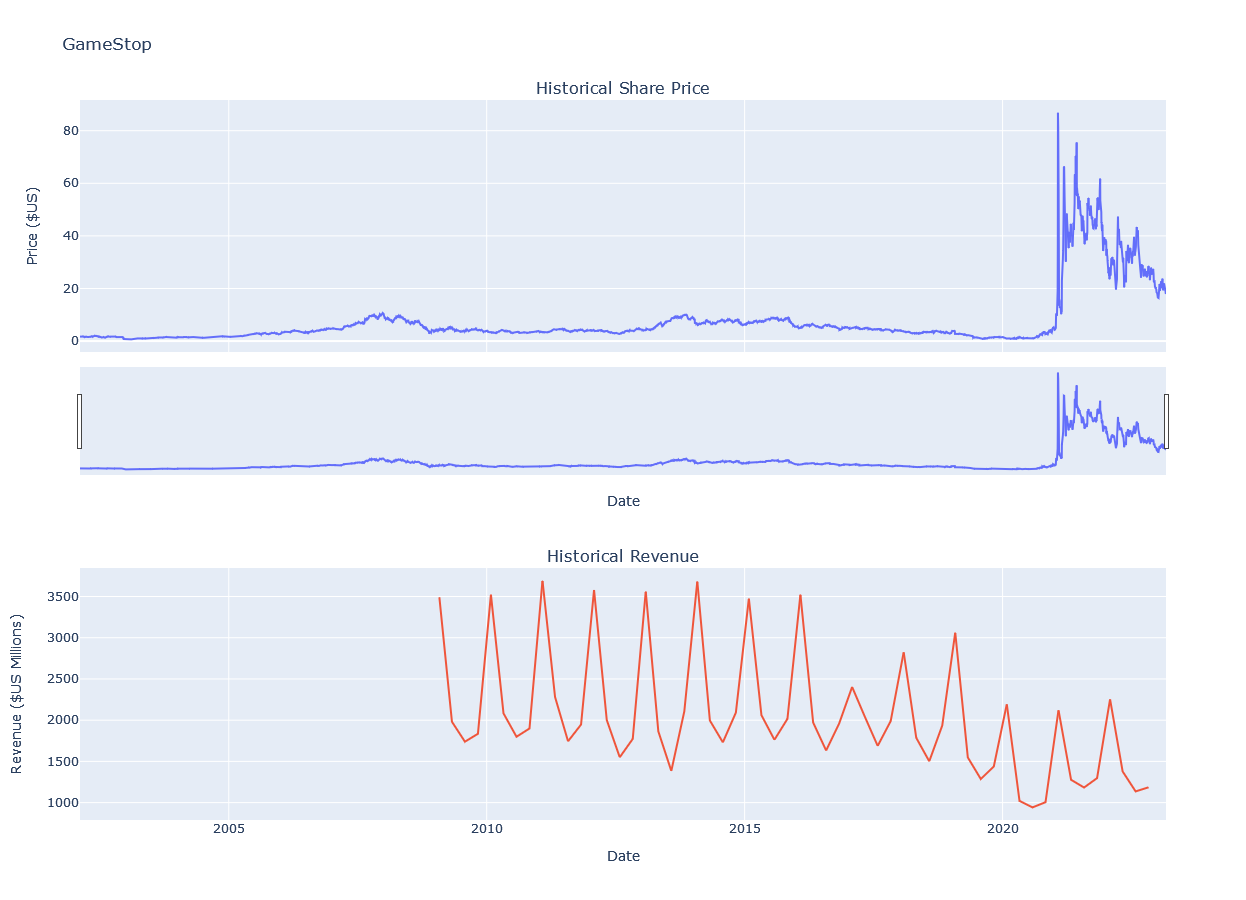

In [48]:
make_graph(gamestop_data, gme_revenue, 'GameStop')